In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Numpy matrix

In [8]:
A = np.array([[1,2],[3,0.5]])
A

array([[1. , 2. ],
       [3. , 0.5]])

In [14]:
A1 = np.arange(1,7).reshape(-1,1)
A1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [16]:
A2 = A1.reshape(2,3)
A2

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
A3 = np.eye(4)
A3

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [23]:
a = np.arange(5)
A4 = np.diag(a,-2)
A4

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0]])

In [25]:
a = np.arange(9)
A5 = a.reshape(3,3)
A5

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [27]:
np.triu(A5)

array([[0, 1, 2],
       [0, 4, 5],
       [0, 0, 8]])

In [30]:
np.tril(A5,-1)

array([[0, 0, 0],
       [3, 0, 0],
       [6, 7, 0]])

In [31]:
A2

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
A

array([[1. , 2. ],
       [3. , 0.5]])

In [34]:
A+A

array([[2., 4.],
       [6., 1.]])

In [35]:
A*2

array([[2., 4.],
       [6., 1.]])

In [37]:
A6 = A2.T
A6

array([[1, 4],
       [2, 5],
       [3, 6]])

In [42]:
A*A

array([[1.  , 4.  ],
       [9.  , 0.25]])

In [46]:
np.vdot(A,A)

14.25

In [43]:
np.dot(A,A)

array([[7.  , 3.  ],
       [4.5 , 6.25]])

In [41]:
np.dot(A6,A)

array([[13. ,  4. ],
       [17. ,  6.5],
       [21. ,  9. ]])

In [47]:
A3

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [49]:
np.trace(A3)

4.0

In [243]:
A7 = np.array([[1, 3, 4], [2, 1, 3], [2, 3, 7]])

In [244]:
A7

array([[1, 3, 4],
       [2, 1, 3],
       [2, 3, 7]])

In [245]:
np.linalg.matrix_rank(A7)

3

In [246]:
A7inv = np.linalg.inv(A7)

In [247]:
np.dot(A7, A7inv).round(10)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0., -0.,  1.]])

In [249]:
A7.shape

(3, 3)

### Least square method:

$$\hat w = (X^TX)^{-1}X^Ty$$

In [252]:
X = np.array([[8, 3], [3, 1]])
X

array([[8, 3],
       [3, 1]])

In [253]:
y = np.array([2, 4]).reshape(2, 1)
y

array([[2],
       [4]])

In [254]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([[ 10.],
       [-26.]])

therefore y = 10x - 26

In [256]:
np.linalg.lstsq(X,y, rcond=-1)

(array([[ 10.],
        [-26.]]),
 array([], dtype=float64),
 2,
 array([9.10977223, 0.10977223]))

## Linear Regression manually

In [3]:
from ML_basic_function import *

In [4]:
np.random.seed(24)

In [5]:
features, labels = arrayGenReg(delta=0.01)

In [6]:
features

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

$SSE= ||y - X\hat w||_2^2 = (y - \hat y)^T(y - \hat y)$

In [7]:
np.random.seed(24)
w = np.random.randn(3).reshape(-1,1)
w

array([[ 1.32921217],
       [-0.77003345],
       [-0.31628036]])

In [9]:
y_hat = features.dot(w)
y_hat[:10]

array([[ 2.04347616],
       [ 0.02627308],
       [-0.63176501],
       [ 0.20623364],
       [-2.64718921],
       [-0.86880796],
       [ 0.88171608],
       [-1.61055557],
       [ 0.80113619],
       [-0.49279524]])

In [12]:
(labels - y_hat).T.dot(labels - y_hat)

array([[2093.52940481]])

In [13]:
# MSE
(labels - y_hat).T.dot(labels - y_hat)/len(labels)

array([[2.0935294]])

In [14]:
def SSELoss(X, w, y):
    """
    SSE calculation function
    
    :param X：features
    :param w：weights
    :param y：labels
    :return SSE：
    """
    y_hat = X.dot(w)
    SSE = (y - y_hat).T.dot(y - y_hat)
    return SSE

In [15]:
SSELoss(features, w, labels)

array([[2093.52940481]])

In [17]:
# Check if $X^TX$ exists
np.linalg.det(features.T.dot(features))

967456500.179829

&emsp;&emsp;行列式不为0，因此$X^TX$逆矩阵存在，可以通过最小二乘法求解。具体求解方法分为两种，其一是使用NumPy中线性代数基本方法，根据上述公式进行求解，同时也可以直接使用lstsq函数进行求解。

In [29]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(labels)
w

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

In [30]:
y_hat = features.dot(w)

In [19]:
SSELoss(features, w, labels)

array([[0.09300731]])

In [21]:
SSELoss(features, w, labels) / len(labels)

array([[9.30073138e-05]])

$$SSR =\sum^{n}_{i=1}(\bar{y_i}-\hat{y_i})^2$$

$$SST =\sum^{n}_{i=1}(\bar{y_i}-y_i)^2$$

$$R-square=\frac{SSR}{SST}=\frac{SST-SSE}{SSE}=1-\frac{SSE}{SST}$$

except for the SSE, the model can be evaluated by R2, which can be calculated according to above function.

In [31]:
ssr = np.power(labels.mean() - y_hat, 2).sum()
sst = np.power(labels.mean() - labels, 2).sum()

In [32]:
r2 = ssr/sst

In [33]:
r2

0.9999811429939424

In [42]:
x = np.linspace(-10,10,100)

In [43]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [44]:
x.mean()

-7.105427357601002e-17

In [45]:
y = (x -x.mean())/x.std()

In [46]:
y

array([-1.71481604, -1.68017329, -1.64553055, -1.6108878 , -1.57624505,
       -1.5416023 , -1.50695955, -1.4723168 , -1.43767406, -1.40303131,
       -1.36838856, -1.33374581, -1.29910306, -1.26446031, -1.22981757,
       -1.19517482, -1.16053207, -1.12588932, -1.09124657, -1.05660382,
       -1.02196108, -0.98731833, -0.95267558, -0.91803283, -0.88339008,
       -0.84874733, -0.81410459, -0.77946184, -0.74481909, -0.71017634,
       -0.67553359, -0.64089084, -0.6062481 , -0.57160535, -0.5369626 ,
       -0.50231985, -0.4676771 , -0.43303435, -0.39839161, -0.36374886,
       -0.32910611, -0.29446336, -0.25982061, -0.22517786, -0.19053512,
       -0.15589237, -0.12124962, -0.08660687, -0.05196412, -0.01732137,
        0.01732137,  0.05196412,  0.08660687,  0.12124962,  0.15589237,
        0.19053512,  0.22517786,  0.25982061,  0.29446336,  0.32910611,
        0.36374886,  0.39839161,  0.43303435,  0.4676771 ,  0.50231985,
        0.5369626 ,  0.57160535,  0.6062481 ,  0.64089084,  0.67

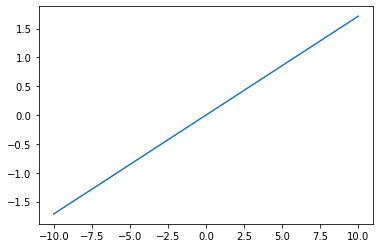

In [47]:
plt.plot(x, y)